# 이미지 이진화 (Image Thesholding)


## 기본 임계 처리
- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것
  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!
  - 임계값보다 크면 백, 작으면 흑이 되는데,  
    기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태

- 기본적으로 이미지의 segmenting의 가장 간단한 방법

- `cv2.threshold()`

  - Parameters  
    - `src` : input image로 single-channel 이미지.(grayscale 이미지)
    
    - `thresh` : 임계값

    - `maxval` : 임계값을 넘었을 때 적용할 value

    - `type` : thresholding type

  <br>

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval

      - 그 외, 0

    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, maxval

    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh

      - 그 외, src(x, y)

    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)

      - 그 외, 0

    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, src(x, y)

* letters.jpg

  <img src="https://cdn.pixabay.com/photo/2018/09/26/09/07/letters-3704026_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/letters-school-learn-alphabet-abc-3704026/</sub>

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

In [10]:
up = files.upload()

Saving letters.jpg to letters.jpg


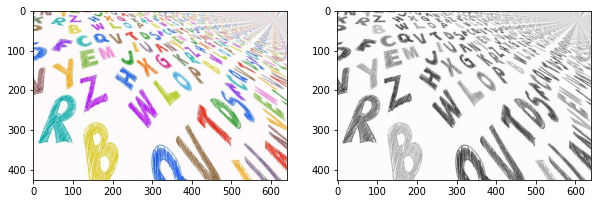

In [12]:
letter = cv2.imread('letters.jpg')[:,:,::-1]
img = cv2.imread('letters.jpg', 0)          # 0 -Gray scale
plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(letter)
plt.subplot(122), plt.imshow(img, cmap='gray')
plt.show()

In [13]:
_, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)


In [14]:
titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

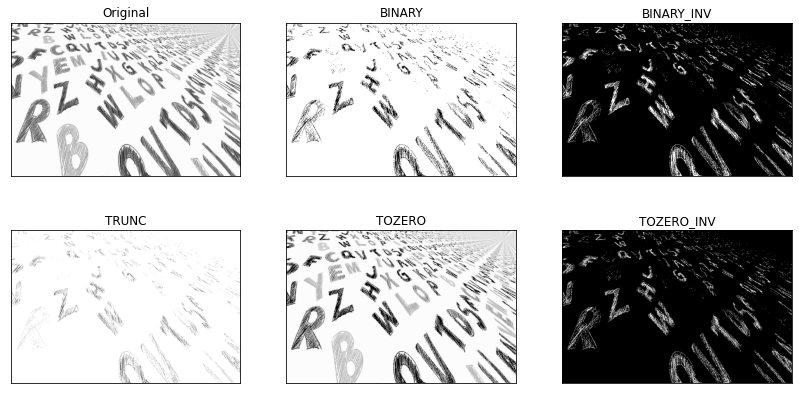

In [16]:
plt.figure(figsize=(14, 7))
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

- 이미지
  - snow.jpg

  <img src="https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflake-554635_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/snowflake-snow-snowing-winter-cold-554635/</sub>

In [17]:
up = files.upload()

Saving snow.jpg to snow.jpg


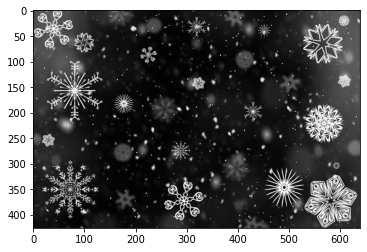

In [19]:
img = cv2.imread('snow.jpg', 0)          # 0 -Gray scale
plt.imshow(img, cmap='gray');


In [20]:
_, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)


In [21]:
titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

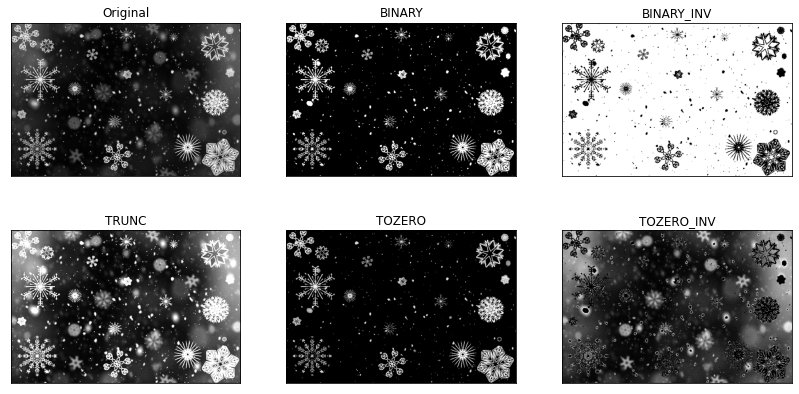

In [22]:
plt.figure(figsize=(14, 7))
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

- 시각화

## 적응 임계처리

- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에  
  하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨

- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

- `cv2.adaptiveThreshold()`

  - Parameters  
    - `src` : grayscale image

    - `maxValue` : 임계값

    - `adaptiveMethod` : thresholding value를 결정하는 계산 방법

    - `thresholdType` : threshold type

    - `blockSize` : thresholding을 적용할 영역 사이즈

    - `C` : 평균이나 가중평균에서 차감할 값

  <br>
  
  - Adaptive Method
    - `cv2.ADAPTIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정

    - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시안 값으로 결정


In [ ]:
_, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

- 시각화

In [ ]:
titles = ['Original','Global','Mean','Gaussian']
images = [img, th1, th2, th3]

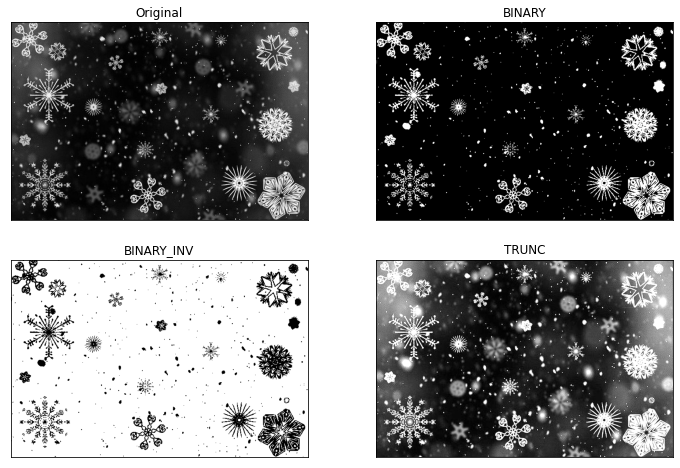

In [24]:
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i], cmap='gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
plt.show()

## Otsu의 이진화
- `Otsu의 이진화`(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

- 임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU` 를 적용.
  이때 임계값은 0으로 전달

- 이미지
  - noise.jpg

  <img src="https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/star-grey-noise-banner-monochrome-1951963/</sub>

In [25]:
up = files.upload()

Saving noise.jpg to noise.jpg


In [ ]:
img = cv2.imread('noise.jpg',0)
img.shape

In [28]:
_, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

- 시각화

In [29]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original','Histogram','Global Thresholding',
          'Original','Histogram','Otsu\'s Thresholding',
          'Original filtered image','Histogram','Otsu\'s Thresholding']


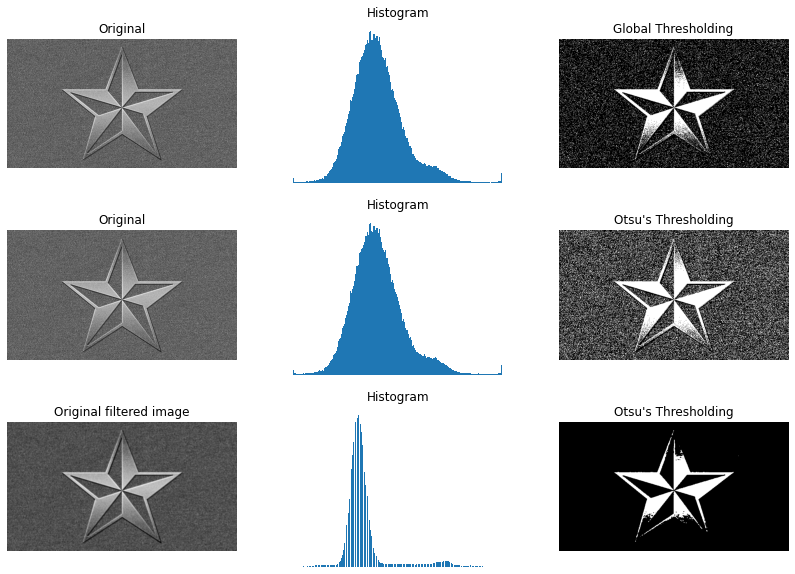

In [30]:
plt.figure(figsize=(14,10))
for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], cmap='gray')
    plt.title(titles[i*3])
    plt.axis('off')

    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.axis('off')

    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], cmap='gray')
    plt.title(titles[i*3+2])
    plt.axis('off')

plt.show()
